## Creating dataset

In [1]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch import optim
from tqdm import tqdm
from glob import glob

import matplotlib.pyplot as plt

from models.convnet import ConvNet
from models.resnet import ResNet

from dataset.ba_dataset import setup_data_loaders
from dataset.preprocessing import Transform

/home/zhdano82/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(glob('/bigdata/hplsim/aipp/Maksim/BA_simulation/layer_3_easy/*'))

10000

In [3]:
n_samples = 100 #len(glob.glob('/bigdata/hplsim/aipp/Maksim/BA_simulation/layer_3_easy/*'))
batch_size = 100
pin_memory = False
num_workers = 0
path = '/bigdata/hplsim/aipp/Maksim/BA_simulation/layer_3_easy/'
preload = True
val_frac = .01

transformation = Transform(True, True, True)
loaders = setup_data_loaders(path, n_samples, batch_size, transform=transformation, val_frac = val_frac, preload=preload, num_workers=num_workers, pin_memory=pin_memory)

100%|██████████| 1/1 [00:00<00:00, 62.33it/s]

Data loaders created


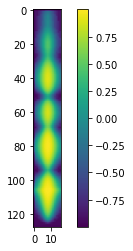

In [4]:
plt.imshow(loaders['train'].dataset[3][0].squeeze())
plt.colorbar()

# Surrogate model

In [1]:
%run train_surrogate.py --n_samples 8000 --n_channels 64 --n_epochs 1000 --data_min 30 --data_max 20000 --log 1 --minmax 1 --data_path '/bigdata/hplsim/aipp/Maksim/BA_simulation/layer_3_hard/'

/home/zhdano82/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  5%|▍         | 378/7600 [00:01<00:21, 341.63it/s]


File 378.h5 is not found


TypeError: cannot unpack non-iterable NoneType object

In [34]:
transformation = Transform(0, 0, 0, None, None)
loaders = setup_data_loaders(
    args.data_path , 5000, 100, 
    transform=transformation, val_frac = 0.05, preload=True)

100%|██████████| 250/250 [00:02<00:00, 120.36it/s]

Data loaders created


In [27]:
import numpy as np

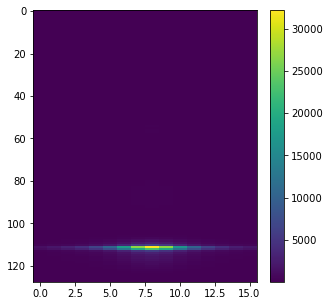

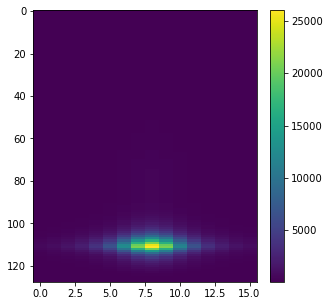

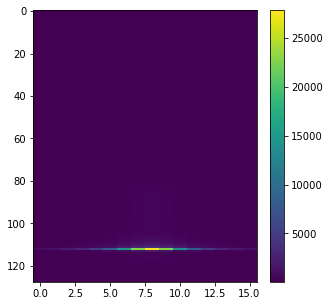

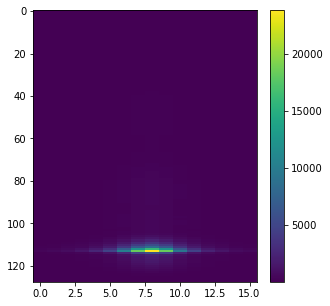

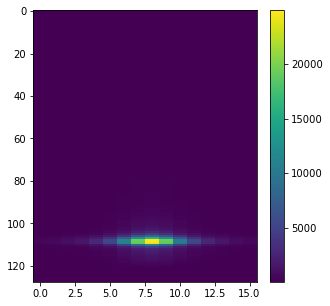

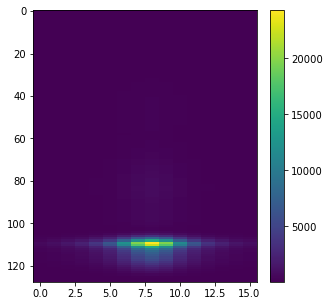

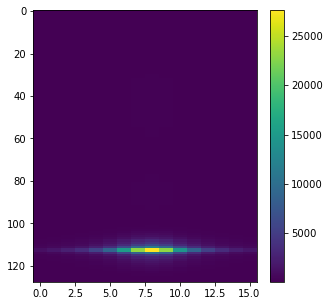

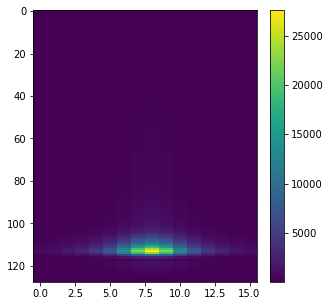

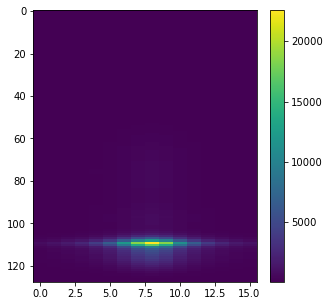

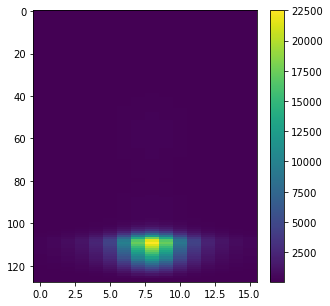

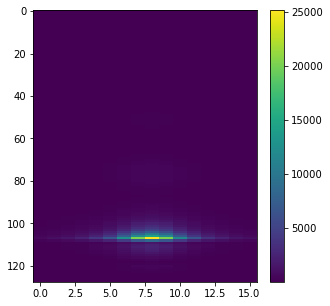

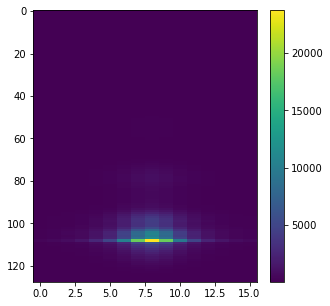

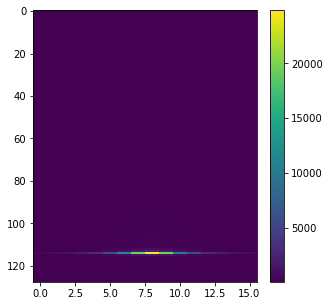

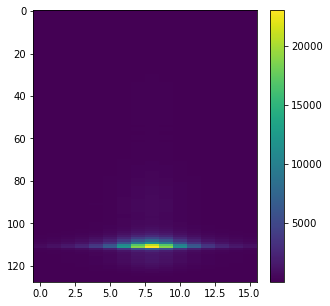

In [57]:
a = []
for x,y in loaders['train'].dataset:
    y = np.array(y)
    if x.max().item() > 20000 and x.min().item() > 0:
        plt.figure(figsize = [5,5])
        plt.imshow(x.squeeze(), interpolation='nearest', aspect='auto')
        plt.colorbar()
        a.append(y)

In [58]:
a = np.array(a)

In [67]:
labels[15 % 6]

'roughness'

In [ ]:
sus = [6,8,9,15] #extreme mins
sus = [6,3,9,15]

In [62]:
np.where(a.mean(0) > 0.8 )

(array([ 5,  6, 11, 15, 17]),)

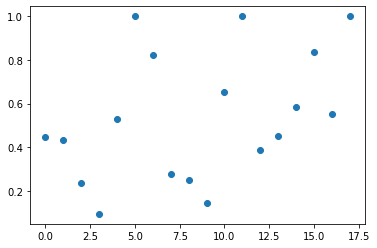

In [59]:
plt.scatter(range(18), a.mean(0))

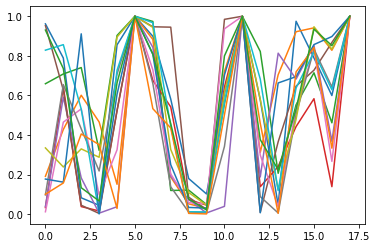

In [41]:
for i in range(len(a)):
    plt.plot(a[i])

In [70]:
maxs = [data[0].max().item() for data in loaders['train'].dataset] # if (data[0].min().item() > 0 and data[0].max().item() < 2000)]
mins = [data[0].min().item() for data in loaders['train'].dataset] # if (data[0].min().item() > 0 and data[0].max().item() < 2000)]
ys = np.concatenate([data[1] for data in loaders['train'].dataset]).reshape(-1,18) # if (data[0].min().item() > 0 and data[0].max().item() < 2000)]).reshape(-1,18)

In [71]:
labels = ['delta', 'beta', 'thickness', 'roughness', 'hurst', 'corrlen']

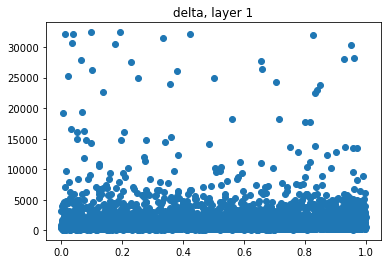

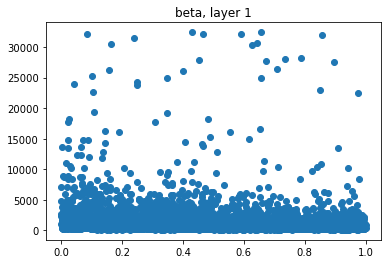

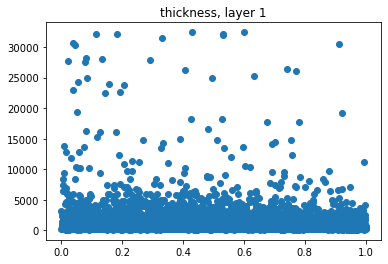

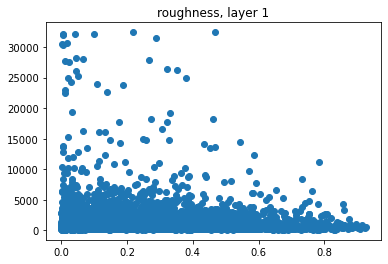

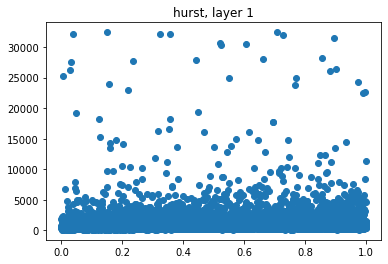

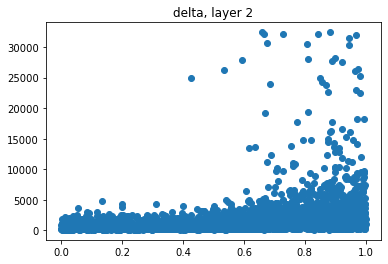

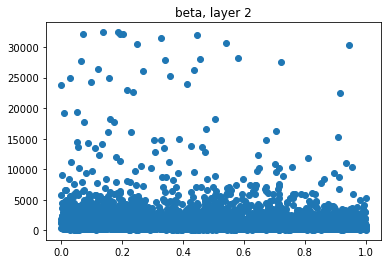

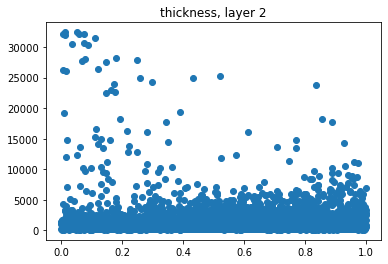

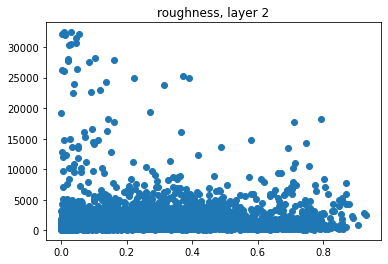

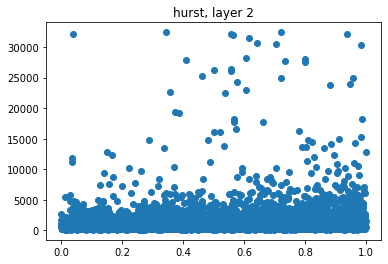

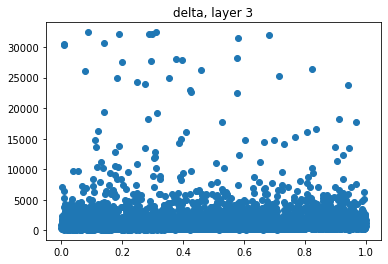

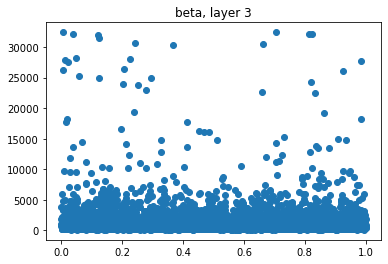

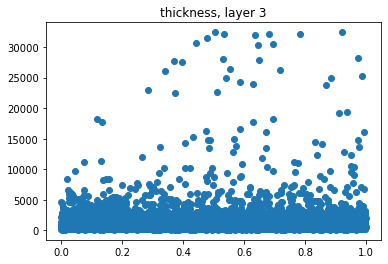

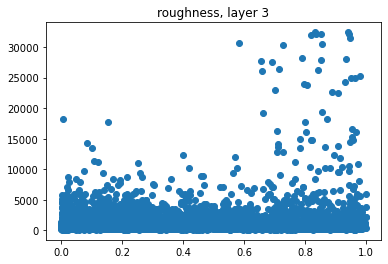

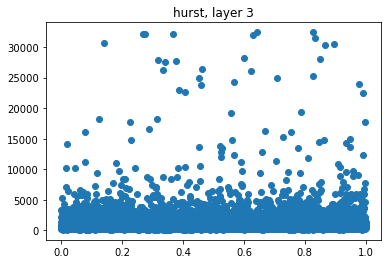

In [72]:
for i in range(18):
    if (i+1) % 6 != 0:        
        plt.scatter(ys[:,i], maxs)
        plt.title(labels[i % 6] + ', layer ' + str(i // 6 + 1))
        plt.show()

In [104]:
from sklearn.decomposition import PCA

In [134]:
pca = PCA(n_components=2)
X,y = next(iter(loaders['train']))
X = np.array(X).reshape(1000,-1)
y = np.array(y)
X_pca = pca.fit_transform(X)

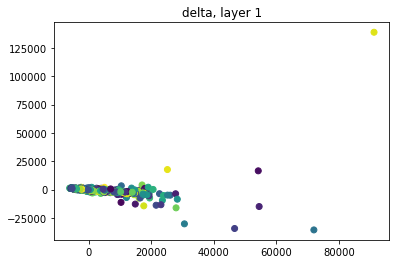

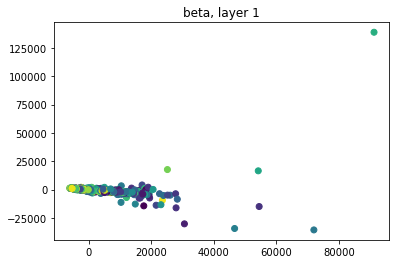

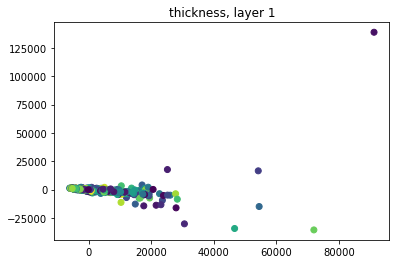

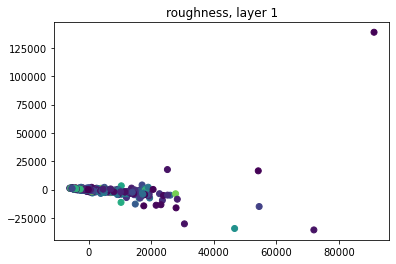

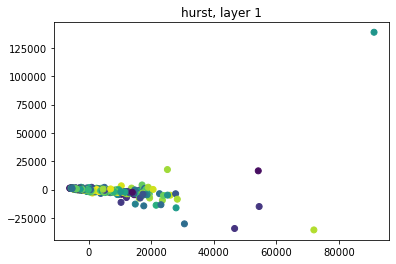

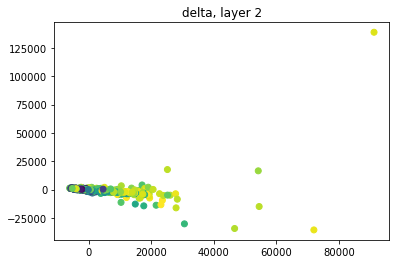

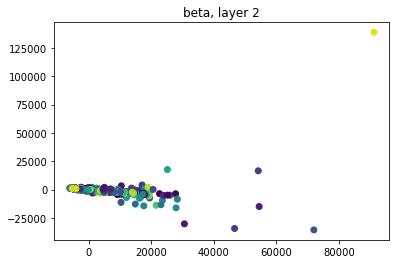

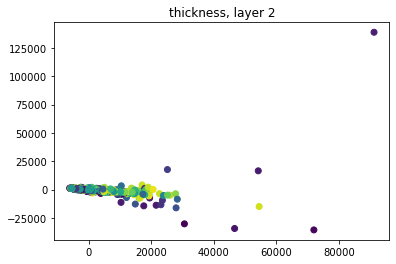

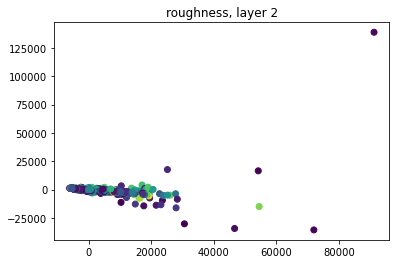

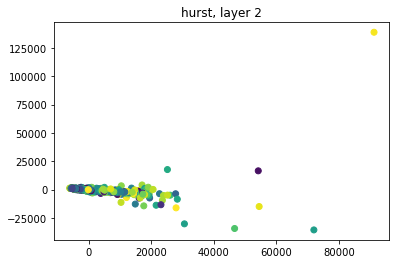

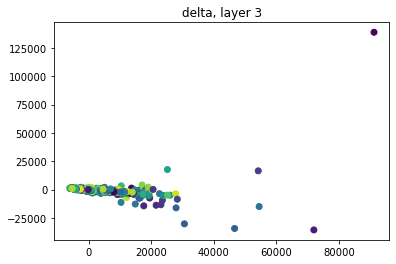

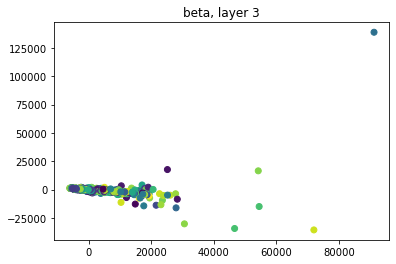

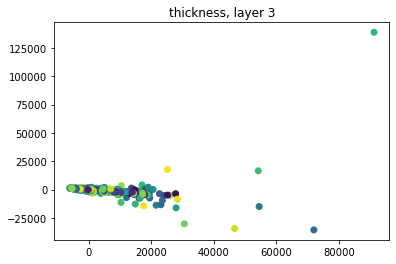

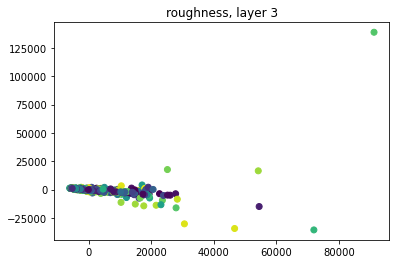

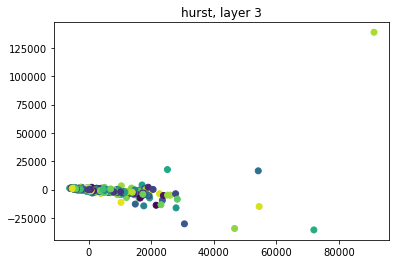

In [148]:
for i in range(18):
    if (i+1) % 6 != 0:        
        plt.scatter(*X_pca.T, c = y[:,i])
        plt.title(labels[i % 6] + ', layer ' + str(i // 6 + 1))
        plt.show()

In [3]:
xs, ys = next(iter(loaders['train']))
x_pred = model(ys.cuda())

NameError: name 'model' is not defined

In [5]:
import matplotlib.pyplot as plt
import random

NameError: name 'x_pred' is not defined

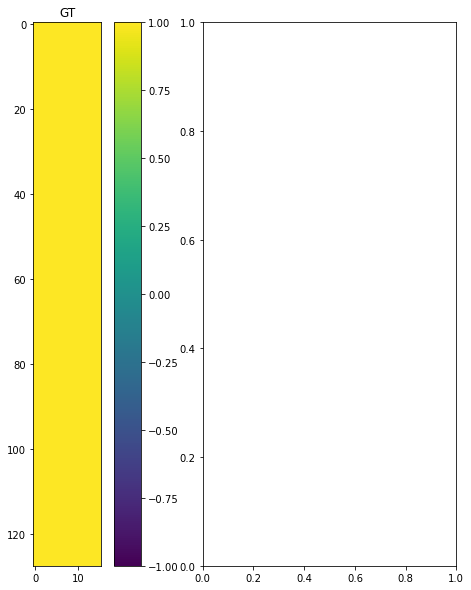

In [6]:
plt.figure(figsize = [10,10])

i = random.randint(0, args.batch_size)

plt.subplot(1, 2, 1)
plt.imshow(xs.squeeze()[0], vmin = -1, vmax = 1)
plt.colorbar()
plt.title('GT')

plt.subplot(1, 2, 2)
plt.imshow(x_pred[i,0].cpu().detach(), vmin = -1, vmax = 1)
plt.colorbar()
plt.title('pred')

In [18]:
xs

tensor([[[-0.9982, -0.9977, -0.9977,  ..., -0.9976, -0.9977, -0.9977],
         [-0.9977, -0.9970, -0.9970,  ..., -0.9970, -0.9970, -0.9970],
         [-0.9977, -0.9970, -0.9970,  ..., -0.9970, -0.9970, -0.9970],
         ...,
         [-0.9977, -0.9970, -0.9970,  ..., -0.9970, -0.9970, -0.9970],
         [-0.9977, -0.9970, -0.9970,  ..., -0.9970, -0.9970, -0.9970],
         [-0.9977, -0.9971, -0.9971,  ..., -0.9971, -0.9971, -0.9971]],

        [[-0.9982, -0.9976, -0.9976,  ..., -0.9976, -0.9976, -0.9976],
         [-0.9977, -0.9970, -0.9970,  ..., -0.9970, -0.9970, -0.9970],
         [-0.9977, -0.9970, -0.9970,  ..., -0.9969, -0.9970, -0.9970],
         ...,
         [-0.9976, -0.9970, -0.9970,  ..., -0.9969, -0.9970, -0.9970],
         [-0.9977, -0.9970, -0.9970,  ..., -0.9970, -0.9970, -0.9970],
         [-0.9977, -0.9971, -0.9971,  ..., -0.9971, -0.9971, -0.9971]],

        [[-0.9983, -0.9977, -0.9977,  ..., -0.9977, -0.9977, -0.9977],
         [-0.9977, -0.9970, -0.9970,  ..., -0